In [1]:
import numpy as np

# dataset_to_use = "ALVAREZ-HAD"
# dataset_to_use = "ARZ-HAD"
# dataset_to_use = "ARZ-EM"

# dataset = datasets.Dataset(dataset_name, dataset_em, dataset_noise)
# dataset_name = "ALVAREZ"
# dataset_em = False
# dataset_noise = True

# dataset_name = "ARZ"  
# dataset_em = False  
# dataset_noise = True

dataset_name = "ARZ"  
dataset_em = True  
dataset_noise = True

MAX_WEIGHT = 10

if dataset_name == "ALVAREZ" and dataset_em == False and dataset_noise == True:
    dataset_to_use = "ALVAREZ-HAD"
    
if dataset_name == "ARZ" and dataset_em == False and dataset_noise == True:
    dataset_to_use = "ARZ-HAD"

if dataset_name == "ARZ" and dataset_em == True and dataset_noise == True:
    dataset_to_use = "ARZ-EM"
    
with open(f"{dataset_to_use}_weights.npy", "rb") as f:  
    file_contents = np.load(f)
    WEIGHTING_energy_list = file_contents[:, 0]
    WEIGHTING_weight_list = file_contents[:, 1]
    WEIGHTING_count_list = file_contents[:, 2]
    
print(WEIGHTING_energy_list, WEIGHTING_weight_list, WEIGHTING_count_list)

# https://stackoverflow.com/questions/2566412/find-nearest-value-in-numpy-array
def find_nearest_and_return_index(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

def get_weight_by_log10_shower_energy(log10_shower_energy):
    nearest_idx = find_nearest_and_return_index(WEIGHTING_energy_list, log10_shower_energy)

    weight_for_nearest_idx = WEIGHTING_weight_list[nearest_idx]
    if weight_for_nearest_idx > MAX_WEIGHT:
        return MAX_WEIGHT
    else:
        return weight_for_nearest_idx


[16.         16.10344828 16.20689655 16.31034483 16.4137931  16.51724138
 16.62068966 16.72413793 16.82758621 16.93103448 17.03448276 17.13793103
 17.24137931 17.34482759 17.44827586 17.55172414 17.65517241 17.75862069
 17.86206897 17.96551724 18.06896552 18.17241379 18.27586207 18.37931034
 18.48275862 18.5862069  18.68965517 18.79310345 18.89655172 19.        ] [ 1.          1.          1.          1.          1.          1.
  1.          1.          1.         14.91664045  4.47823213  4.13714884
  3.73004012  2.91277641  2.80990756  2.93731417  2.44988634  2.30529898
  2.19944341  1.89180563  1.7134598   1.58129919  1.58536993  1.43723101
  1.3323593   1.23120862  1.15264949  1.10366336  1.          1.        ] [    0.     0.     0.     0.     0.     0.     0.     0.     0.  3179.
 10589. 11462. 12713. 16280. 16876. 16144. 19356. 20570. 21560. 25066.
 27675. 29988. 29911. 32994. 35591. 38515. 41140. 42966. 47420.     0.]


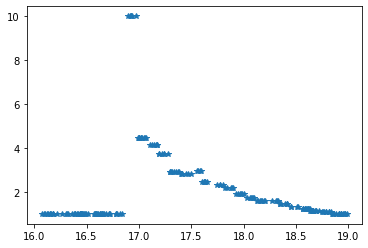

In [2]:

# Generate random numbers in the interval we are looking for (between 16 and 19)
random_energy_array = np.random.random(size=200)*3 + 16 
weight_array = [get_weight_by_log10_shower_energy(random_energy) for random_energy in random_energy_array]

import matplotlib.pyplot as plt
plt.plot(random_energy_array, weight_array, "*")